In [2]:
# ---------------------------------------------
# 日本の銘柄はpandas_datareaderで読み込めないので、スクレイピングのメソッドを作って読み込み。
from ok_datareaderYahooJP import datareaderYahooJP
import datetime

start_all = '2014/5/20'
end = datetime.datetime.today()

ucd = datareaderYahooJP(8057, start=start_all)
print('--- ucd.head() ---')
print(ucd.head())


--- ucd.head() ---
           Open   High    Low  Close    Volume  Adj Close
Date                                                     
2014-05-20  288  289.0  286.0  287.0   45000.0     1435.0
2014-05-21  286  289.0  286.0  287.0   60000.0     1435.0
2014-05-22  287  291.0  286.0  289.0   86000.0     1445.0
2014-05-23  289  294.0  289.0  293.0   81000.0     1465.0
2014-05-26  294  298.0  294.0  296.0  134000.0     1480.0


In [3]:
#----------------------------------------
# 終値の指数変化率を計算
import numpy as np

print('--- calculate logarithm of ucd ---')
ucd_Close_ln = np.log(ucd.Close)
print(ucd_Close_ln.head())


--- calculate logarithm of ucd ---
Date
2014-05-20    5.659482
2014-05-21    5.659482
2014-05-22    5.666427
2014-05-23    5.680173
2014-05-26    5.690359
Name: Close, dtype: float64


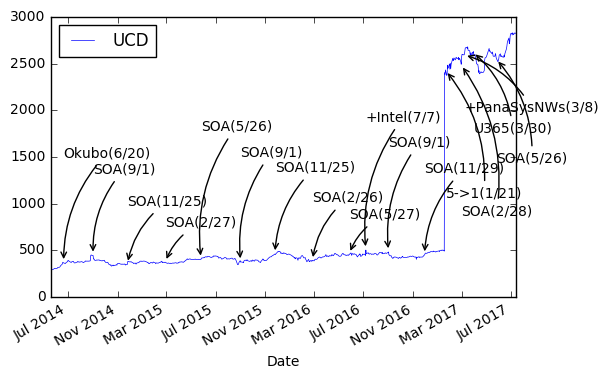

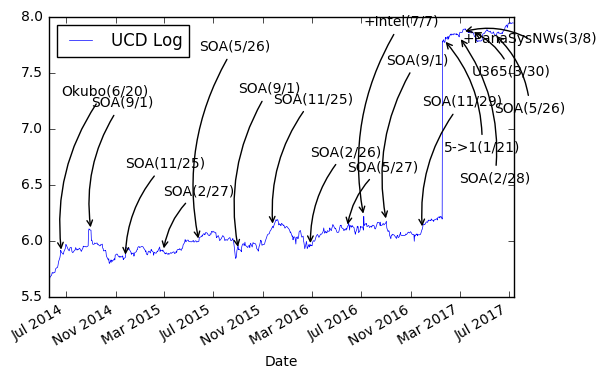

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt

# eventを設定
events_2014=[('2014/6/20','Okubo(6/20)'),('2014/9/1','SOA(9/1)'),('2014/11/25','SOA(11/25)')]
events_2015=[('2015/2/27','SOA(2/27)'),('2015/5/26','SOA(5/26)'),('2015/9/1','SOA(9/1)'),('2015/11/25','SOA(11/25)')]
events_2016=[('2016/2/26','SOA(2/26)'),('2016/5/27','SOA(5/27)'),('2016/7/7','+Intel(7/7)'),('2016/9/1','SOA(9/1)'),('2016/11/29','SOA(11/29)')]
events_2017=[('2017/1/21','5->1(1/21)'),('2017/2/28','SOA(2/28)'),('2017/3/8','+PanaSysNWs(3/8)'),('2017/3/30','U365(3/30)'),('2017/5/26','SOA(5/26)')]
events = events_2014 + events_2015 + events_2016

# -------------------------------------------------
# 全体をプロット
# プロットに必要なウィンドウを取得
fig_1 = plt.figure()

# サブプロットを追加 （1行目、1列、1番）
g_1=fig_1.add_subplot(1,1,1)

# チャートを描画
ucd.Close.plot(ax=g_1, style='b-',linewidth=0.5, label='UCD')
g_1.legend(loc='upper left')

# X軸の範囲を指定
g_1.set_xlim([start_all, end])

i = 0
for date, label in events:
    i = i + 1
    g_1.annotate(label,
           xy=(date, ucd.Close.asof(date)+10),    # annotateを指定する座標 asof(date)で指定日のデータを取得
        xytext=(date, ucd.Close.asof(date) +1500 +(-250*(i%5))),    # annotateの文字の表示座標
        horizontalalignment='left', 
        verticalalignment='top',
        arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.2")    # 矢印
    )
for date, label in events_2017:
    i = i + 1
    g_1.annotate(label,
           xy=(date, ucd.Close.asof(date)-10),    # annotateを指定する座標 asof(date)で指定日のデータを取得
        xytext=(date, ucd.Close.asof(date) -500 +(-250*(i%5))),    # annotateの文字の表示座標
        horizontalalignment='left', 
        verticalalignment='top',
        arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.2")    # 矢印
    )

# -------------------------------------------------
# 全体をプロット 指数の対数
# プロットに必要なウィンドウを取得
fig_2 = plt.figure()

# サブプロットを追加 （1行目、1列、1番）
g_2=fig_2.add_subplot(1,1,1)

# チャートを描画
ucd_Close_ln.plot(ax=g_2, style='b-',linewidth=0.5, label='UCD Log')
g_2.legend(loc='upper left')

# X軸の範囲を指定
g_2.set_xlim([start_all, end])

i = 0
for date, label in events:
    i = i + 1
    g_2.annotate(label,
           xy=(date, ucd_Close_ln.asof(date)),    # annotateを指定する座標 asof(date)で指定日のデータを取得
        xytext=(date, ucd_Close_ln.asof(date) +1.8 +(-0.3*(i%5))),    # annotateの文字の表示座標
        horizontalalignment='left', 
        verticalalignment='top',
        arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.2")    # 矢印
    )
for date, label in events_2017:
    i = i + 1
    g_2.annotate(label,
           xy=(date, ucd_Close_ln.asof(date)),    # annotateを指定する座標 asof(date)で指定日のデータを取得
        xytext=(date, ucd_Close_ln.asof(date) +(-0.3*(i%5))),    # annotateの文字の表示座標
        horizontalalignment='left', 
        verticalalignment='top',
        arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.2")    # 矢印
    )

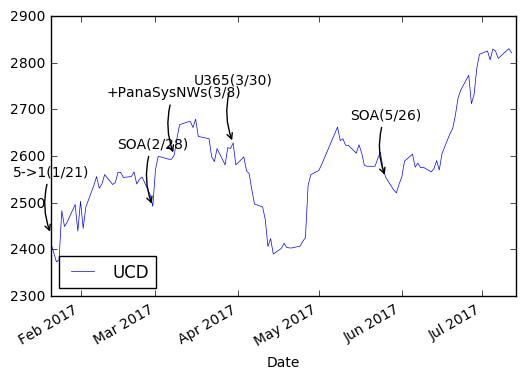

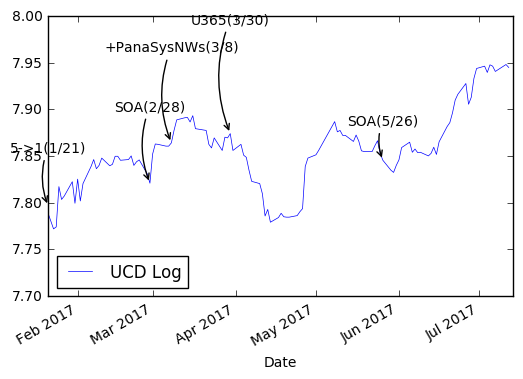

In [5]:
# -------------------------------------
fig_3 = plt.figure()
g_3=fig_3.add_subplot(1,1,1)
ucd.Close.plot(ax=g_3, style='b-',linewidth=0.5, label='UCD')
g_3.legend(loc='lower left')
g_3.set_xlim(['2017/1/21',end])
g_3.set_ylim([2300,2900])

i = 0
for date, label in events_2017:
    i = i + 1
    g_3.annotate(label,
           xy=(date, ucd.Close.asof(date)),    # annotateを指定する座標 asof(date)で指定日のデータを取得
        xytext=(date, ucd.Close.asof(date) +150),    # annotateの文字の表示座標
        horizontalalignment='center', 
        verticalalignment='top',
        arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.2")    # 矢印
    )
    
# -------------------------------------
fig_4 = plt.figure()
g_4=fig_4.add_subplot(1,1,1)
ucd_Close_ln.plot(ax=g_4, style='b-',linewidth=0.5, label='UCD Log')
g_4.legend(loc='lower left')
g_4.set_xlim(['2017/1/21',end])
g_4.set_ylim([7.7, 8])

i = 0
for date, label in events_2017:
    i = i + 1
    g_4.annotate(label,
           xy=(date, ucd_Close_ln.asof(date)),    # annotateを指定する座標 asof(date)で指定日のデータを取得
        xytext=(date, ucd_Close_ln.asof(date) + 0.05 +(0.02*(i%5))),    # annotateの文字の表示座標
        horizontalalignment='center', 
        verticalalignment='top',
        arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.2")    # 矢印
    )